In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [5]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [6]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [7]:
# first convert NaN to 0
df['horsepower'] = df['horsepower'].apply(lambda x: 0 if pd.isna(x) else x)
# then replacing 0 with mean
df['horsepower'] = df['horsepower'].apply(lambda x: df['horsepower'].mean() if x == 0 else x)

In [8]:
df['model year'] = df['model year'].astype('int8')
df['cylinders'] = df['cylinders'].astype('int8')
df['horsepower'] = df['horsepower'].astype('int16')

In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.432161,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.200375,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [10]:
data = df.drop(['car name'], axis=1)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


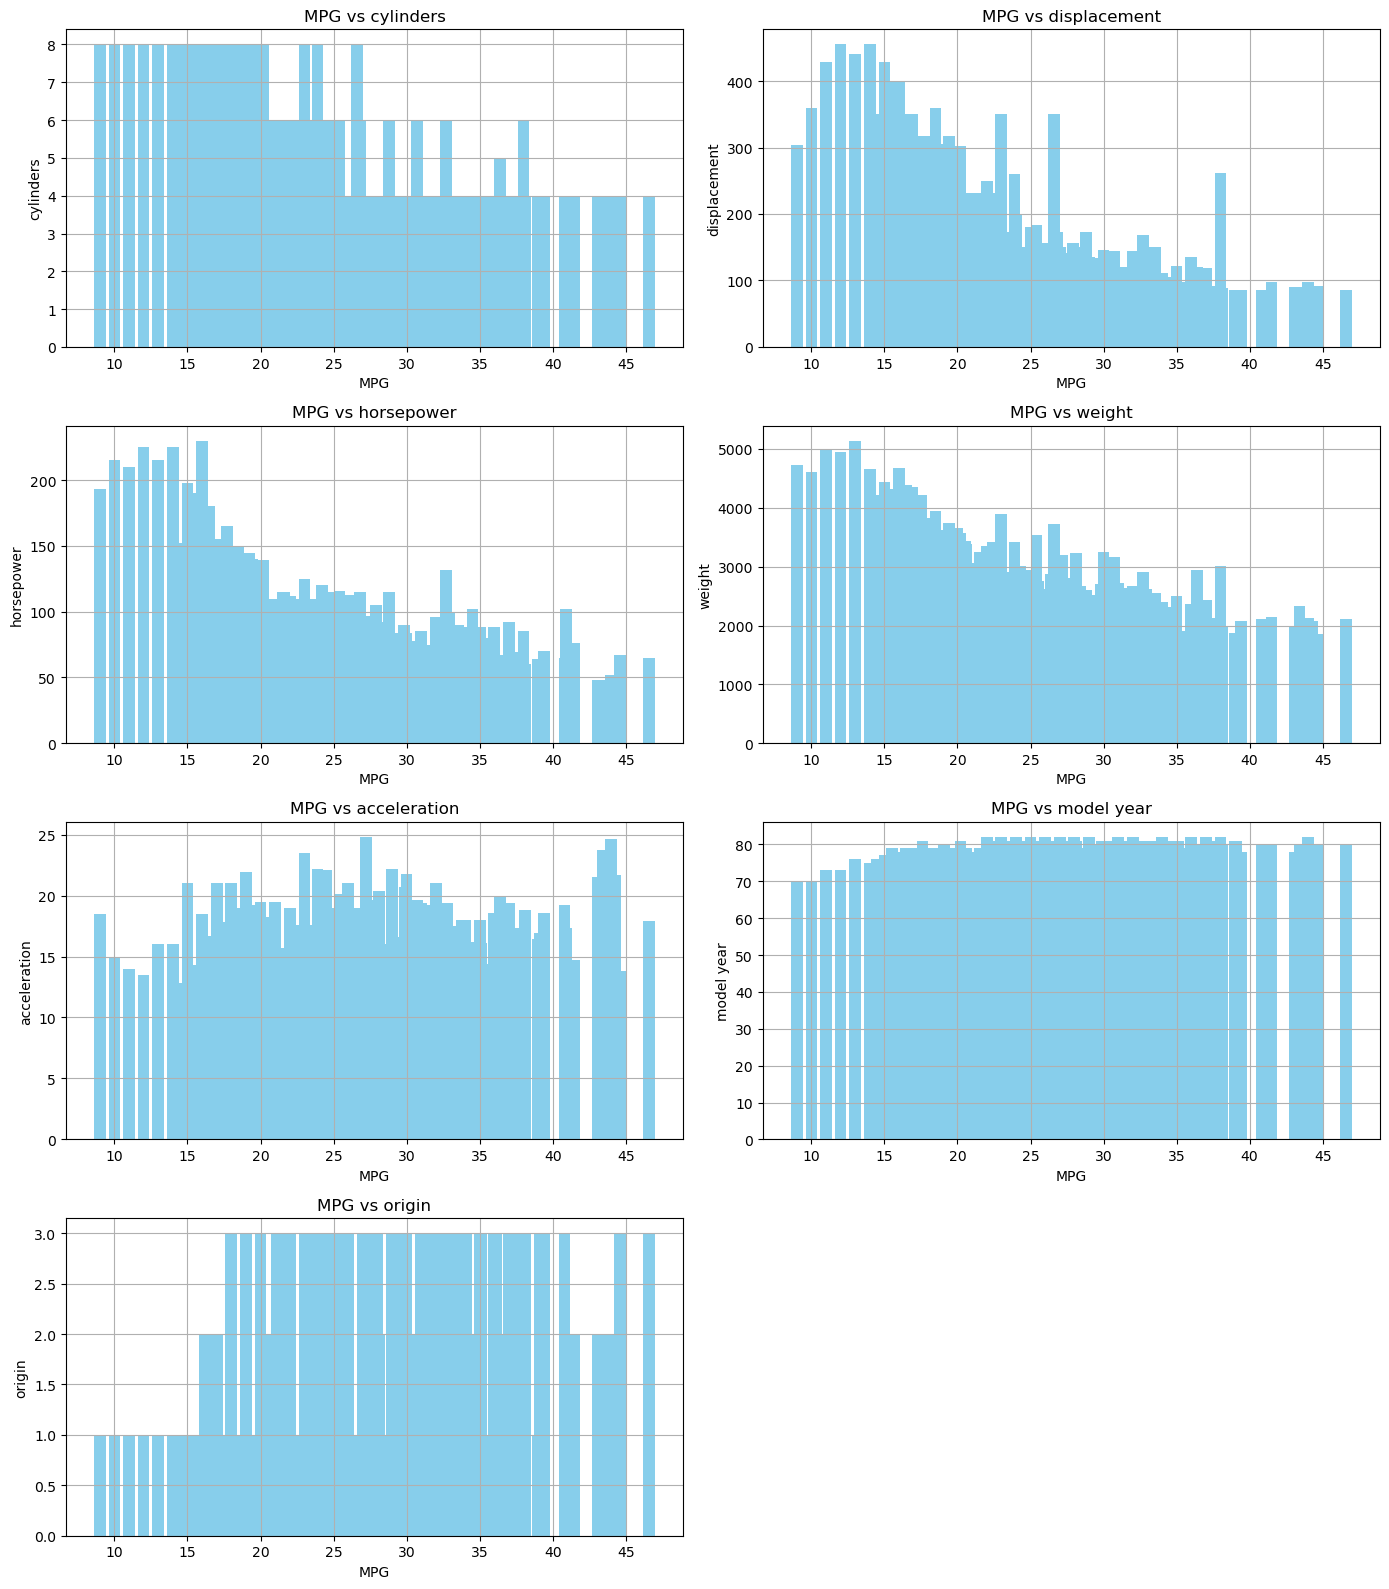

In [11]:
import matplotlib.pyplot as plt

# Select relevant columns
variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']

# Set up subplots
fig, axs = plt.subplots(4, 2, figsize=(14, 16))  # 4x2 layout for 7 variables
axs = axs.flatten()

# Plot each variable against MPG
for i, var in enumerate(variables):
    axs[i].bar(df['mpg'], df[var], color='skyblue')
    axs[i].set_title(f'MPG vs {var}')
    axs[i].set_xlabel('MPG')
    axs[i].set_ylabel(var)
    axs[i].grid(True)

# Hide the last subplot if unused (since 4x2 = 8 plots, and we only need 7)
axs[-1].axis('off')

plt.tight_layout()
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(data.drop('mpg', axis=1), data['mpg'], test_size=0.2, random_state=32)
model = LinearRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.7813802280713336

In [13]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(13.85036837049661, 0.7813802280713336)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=32)

# Initialize model
model = LinearRegression()

# Perform cross-validation and calculate R^2 scores
scores = cross_val_score(model, data.drop('mpg', axis=1), data['mpg'], cv=kf, scoring='r2')

print("R^2 Scores for each fold:", scores)
print("Mean R^2 Score:", np.mean(scores))

R^2 Scores for each fold: [0.78138023 0.85365262 0.79505042 0.8266483  0.79294558]
Mean R^2 Score: 0.8099354264571218


In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
poly_model.fit(X_train, y_train)

print("Polynomial R^2:", poly_model.score(X_test, y_test))

Polynomial R^2: 0.8675097764536115


In [16]:
kf = KFold(n_splits=5, shuffle=True, random_state=32)

degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

scores = cross_val_score(poly_model, data.drop('mpg', axis=1), data['mpg'], cv=kf, scoring='r2')

print("R^2 Scores for each fold:", scores)
print("Mean R^2 Score:", np.mean(scores))

R^2 Scores for each fold: [0.86750978 0.88814832 0.85169157 0.8744088  0.87349646]
Mean R^2 Score: 0.8710509844751592


In [20]:
import pickle

with open("autoMpg_model.pkl", "wb") as file:
  pickle.dump(poly_model, file)